$\textbf{ROI slection}$<br>
$\text{In this workflow we crop the data temporaly and specialy. We also calculate the raw mc, pulse per ions and ion per pulse. }$

In [1]:
# Activate intractive functionality of matplotlib
# Activate intractive functionality of matplotlib
%matplotlib ipympl
# Activate auto reload 
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
# import libraries
import os
import numpy as np
from ipywidgets import fixed
from ipywidgets import interact_manual
from ipywidgets import widgets

# Local module and scripts
from pyccapt.calibration.calibration_tools import share_variables, calibration, ion_selection
from pyccapt.calibration.calibration_tools import widgets as wd
from pyccapt.calibration.data_tools import data_tools, data_loadcrop, dataset_path_qt
from pyccapt.calibration.mc import mc_tools, tof_tools

In [2]:
# Disable showing logging in Jupyter notebook
# logging.disable(sys.maxsize)

In [3]:
button = widgets.Button(
    description='load dataset',
)
@button.on_click
def open_file_on_click(b):
    """
    Event handler for button click event.
    Prompts the user to select a dataset file and stores the selected file path in the global variable dataset_path.
    """
    global dataset_path
    dataset_path = dataset_path_qt.gui_fname().decode('ASCII')
button

Button(description='load dataset', style=ButtonStyle())

In [4]:
# check pytables library and install it
# try:
#     import tables
# except:
#     !conda install --yes --prefix {sys.prefix} pytables

In [5]:
# create object for selection of instrument specifications of the dataset
tdc, pulse_mode, flightPathLength_d, t0_d, max_mc, det_diam = wd.dataset_instrument_specification_selection()

# Display lists and comboboxes to selected instrument specifications
display(tdc, pulse_mode, flightPathLength_d, t0_d, max_mc)

Dropdown(description='Data mode:', options=('surface_concept', 'roentdec', 'leap_epos', 'leap_pos', 'ato_v6'),…

Dropdown(description='Pulse mode:', options=('voltage', 'laser'), value='voltage')

FloatText(value=110.0, description='Flight path length:')

FloatText(value=54.0, description='t0:')

FloatText(value=400.0, description='Max mc:')

In [6]:
# Calculate the maximum possible time of flight (TOF)
max_tof = int(tof_tools.mc2tof(max_mc.value, 1000, 0, 0, flightPathLength_d.value))
print('The maximum possible TOF is:', max_tof, 'ns')
print('=============================')
# create an instance of the Variables opject
variables = share_variables.Variables()
variables.pulse_mode = pulse_mode.value
dataset_main_path = os.path.dirname(dataset_path)
dataset_name_with_extention = os.path.basename(dataset_path)
variables.dataset_name = os.path.splitext(dataset_name_with_extention)[0]
variables.result_data_path = dataset_main_path + '/' + variables.dataset_name 
variables.result_data_name = 'cropped_' +  variables.dataset_name 
variables.result_path = dataset_main_path + '/' + variables.dataset_name + '/load_crop/'

if not os.path.isdir(variables.result_path):
    os.makedirs(variables.result_path, mode=0o777, exist_ok=True)

print('The data will be saved on the path:', variables.result_data_path)
print('=============================')
print('The dataset name after saving is:', variables.result_data_name)
print('=============================')
print('The figures will be saved on the path:', variables.result_path)
print('=============================')

# Create data farame out of hdf5 file dataset
dld_group_storage = data_tools.load_data(dataset_path, tdc.value, mode='raw')

# Remove the data with tof greater thatn Max TOF or below 0 ns
data = data_tools.remove_invalid_data(dld_group_storage, max_tof)
print('Total number of Ions:', len(data))

The maximum possible TOF is: 5010 ns
The data will be saved on the path: D:/pyccapt/tests/data/OLO_AL_6_data
The dataset name after saving is: cropped_OLO_AL_6_data
The figures will be saved on the path: D:/pyccapt/tests/data/OLO_AL_6_data/load_crop/
{'dld': ['high_voltage', 'pulse', 'start_counter', 't', 'x', 'y'], 'oxcart': ['high_voltage', 'main_chamber_vacuum', 'num_events', 'pulse_voltage', 'temperature', 'time_counter'], 'tdc': ['channel', 'high_voltage', 'pulse_voltage', 'start_counter', 'time_data'], 'time': ['time_h', 'time_m', 'time_s']}
The number of data over max_tof: 245
Total number of Ions: 1999982


In [7]:
data

,high_voltage (V),pulse,start_counter,t (ns),x_det (cm),y_det (cm)
0,504.179993,504.179993,6802,67.928490,-3.578449,-0.327918
1,507.595490,507.595490,37928,1924.293078,1.238449,-2.798449
2,507.595490,507.595490,48040,769.611618,0.999673,1.843347
3,508.731995,508.731995,6858,2148.679980,1.378531,-1.575918
4,511.760986,511.760986,30260,2993.222106,1.598204,0.143265
...,...,...,...,...,...,...
1999977,4593.749023,4593.749023,59316,669.423096,1.636408,0.563510
1999978,4593.749023,4593.749023,59566,675.122094,1.407184,1.267102
1999979,4593.749023,4593.749023,59770,681.884082,1.655510,2.228571
1999980,4593.749023,4593.749023,59783,671.453064,-0.366122,-1.948408


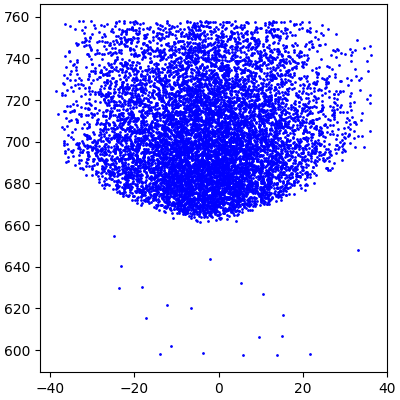

In [23]:
import matplotlib.pyplot as plt
dld_peak = data_crop['t (ns)'].to_numpy()
dld_x_peak = data_crop['y_det (cm)'].to_numpy()
mask_temporal = np.logical_and((dld_peak > 594),
                               (dld_peak < 758))
dld_peak = dld_peak[mask_temporal] 
dld_x_peak = dld_x_peak[mask_temporal]
fig1, ax1 = plt.subplots(figsize=(4,4), constrained_layout=True)
mask = np.random.randint(0, len(dld_peak), 10000)

x = plt.scatter(dld_x_peak[mask]*10, dld_peak[mask], color="blue", label=r"$t$", s=1)
plt.show()

$\textbf {Temporal crop}$
<br>
<br>
$\text {Select the data by drawing a rectangel over the experiment history}$

In [8]:
interact_manual(data_loadcrop.plot_crop_experiment_history, data=fixed(data), variables=fixed(variables), max_tof=widgets.FloatText(value=max_tof), frac=widgets.FloatText(value=1.0),
                bins=fixed((1200,800)), figure_size=fixed((7,3)),
               draw_rect=fixed(False), data_crop=fixed(True), pulse=widgets.Dropdown(options=[('False', False), ('True', True)]), 
                pulse_mode=widgets.Dropdown(options=[('voltage', 'voltage'), ('laser', 'laser')]), save=widgets.Dropdown(options=[('True', True), ('False', False)]),
               figname=widgets.Text(value='hist_ini'));


C:\Users\APTUser\AppData\Local\Temp\ipykernel_18580\797085356.py:1: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  interact_manual(data_loadcrop.plot_crop_experiment_history, data=fixed(data), variables=fixed(variables), max_tof=widgets.FloatText(value=max_tof), frac=widgets.FloatText(value=1.0),


interactive(children=(FloatText(value=5010.0, description='max_tof'), FloatText(value=1.0, description='frac')…

$\text{Boundaries of the selected(cropped) part of the graph is printed below}$

In [9]:
# Crop the dataset
print('Min Idx:', variables.selected_x1, 'Max Idx:', variables.selected_x2)
data_crop = data_loadcrop.crop_dataset(data, variables)

Min Idx: 81336.68334707292 Max Idx: 1991650.782623407


In [10]:
# Plot and selected experiment history
interact_manual(data_loadcrop.plot_crop_experiment_history, data=fixed(data), variables=fixed(variables), max_tof=widgets.FloatText(value=max_tof), frac=widgets.FloatText(value=1.0),
                bins=fixed((1200,800)), figure_size=fixed((7,3)),
               draw_rect=fixed(True), data_crop=fixed(False), pulse=widgets.Dropdown(options=[('False', False), ('True', True)]), 
                pulse_mode=widgets.Dropdown(options=[('voltage', 'voltage'), ('laser', 'laser')]), save=widgets.Dropdown(options=[('True', True), ('False', False)]),
               figname=widgets.Text(value='hist_rect'));


C:\Users\APTUser\AppData\Local\Temp\ipykernel_18580\2819923865.py:2: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  interact_manual(data_loadcrop.plot_crop_experiment_history, data=fixed(data), variables=fixed(variables), max_tof=widgets.FloatText(value=max_tof), frac=widgets.FloatText(value=1.0),


interactive(children=(FloatText(value=5010.0, description='max_tof'), FloatText(value=1.0, description='frac')…

$\textbf {Spacial crop}$
<br>
<br>
$\text {Select the region of maximum concentration of Ions in the below plotted graph to utlize relevant data}$

In [11]:
# Plot and select the FDM
interact_manual(data_loadcrop.plot_crop_fdm, data=fixed(data_crop), variables=fixed(variables), frac=widgets.FloatText(value=1.0),
                bins=fixed((256,256)), figure_size=fixed((5,4)),
               draw_circle=fixed(False), data_crop=fixed(True), 
                save=widgets.Dropdown(options=[('True', True), ('False', False)]),
               figname=widgets.Text(value='fdm_ini'));

C:\Users\APTUser\AppData\Local\Temp\ipykernel_18580\999593063.py:2: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  interact_manual(data_loadcrop.plot_crop_fdm, data=fixed(data_crop), variables=fixed(variables), frac=widgets.FloatText(value=1.0),


interactive(children=(FloatText(value=1.0, description='frac'), Dropdown(description='save', options=(('True',…

$\text {The region selected in the previous step is displayed below.}$

In [12]:
# plot selected area in FDM
interact_manual(data_loadcrop.plot_crop_fdm, data=fixed(data_crop), variables=fixed(variables), frac=widgets.FloatText(value=1.0),
                bins=fixed((256,256)), figure_size=fixed((5,4)),
                draw_circle=fixed(True), data_crop=fixed(False), 
                save=widgets.Dropdown(options=[('True', True), ('False', False)]),
               figname=widgets.Text(value='fdm_circle'));

C:\Users\APTUser\AppData\Local\Temp\ipykernel_18580\3249001940.py:2: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  interact_manual(data_loadcrop.plot_crop_fdm, data=fixed(data_crop), variables=fixed(variables), frac=widgets.FloatText(value=1.0),


interactive(children=(FloatText(value=1.0, description='frac'), Dropdown(description='save', options=(('True',…

$\text {The final selected data after processing is shown below.}$

In [13]:
# Crop and plot the dataset
interact_manual(data_loadcrop.plot_crop_fdm, data=fixed(data_crop), variables=fixed(variables), frac=widgets.FloatText(value=1.0),
                bins=fixed((256,256)), figure_size=fixed((5,4)),
               draw_circle=fixed(False), data_crop=fixed(False), 
                save=widgets.Dropdown(options=[('True', True), ('False', False)]),
               figname=widgets.Text(value='fdm'));

C:\Users\APTUser\AppData\Local\Temp\ipykernel_18580\4052553126.py:2: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  interact_manual(data_loadcrop.plot_crop_fdm, data=fixed(data_crop), variables=fixed(variables), frac=widgets.FloatText(value=1.0),


interactive(children=(FloatText(value=1.0, description='frac'), Dropdown(description='save', options=(('True',…

$\text {Calculate pulses since the last event pulse and ions per pulse.}$

In [14]:
pulse_pi, ion_pp = data_loadcrop.calculate_ppi_and_ipp(data_crop)

# add two calculated array to the croped dataset
data_crop['pulse_pi'] = pulse_pi.astype(np.uintc)
data_crop['ion_pp'] = ion_pp.astype(np.uintc)


d:\pyccapt\pyccapt\calibration\data_tools\data_loadcrop.py:343: RuntimeWarning: overflow encountered in ulong_scalars
  pulse_pi[i] = current_counter - previous_counter
d:\pyccapt\pyccapt\calibration\data_tools\data_loadcrop.py:348: RuntimeWarning: overflow encountered in ulong_scalars
  pulse_to_previous_ion = current_counter - previous_counter
C:\Users\APTUser\AppData\Local\Temp\ipykernel_18580\3659353448.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_crop['pulse_pi'] = pulse_pi.astype(np.uintc)
C:\Users\APTUser\AppData\Local\Temp\ipykernel_18580\3659353448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

$\text {The percentage of loss in ROI selection process.}$

In [15]:
# save the cropped data
print('tof Crop Loss {:.2f} %'.format((100 - (len(data_crop) / len(data)) * 100)))

tof Crop Loss 4.48 %


In [16]:
# exctract needed data from Pandas data frame as an numpy array
dld_highVoltage = data_crop['high_voltage (V)'].to_numpy()
dld_pulseVoltage = data_crop['pulse'].to_numpy()
dld_t = data_crop['t (ns)'].to_numpy()
dld_x = data_crop['x_det (cm)'].to_numpy()
dld_y = data_crop['y_det (cm)'].to_numpy()

data_crop.insert(0, 'x (nm)', np.zeros(len(dld_t)))
data_crop.insert(1, 'y (nm)', np.zeros(len(dld_t)))
data_crop.insert(2,'z (nm)', np.zeros(len(dld_t)))
data_crop.insert(3,'mc_c (Da)', np.zeros(len(dld_t)))
# calculate the mc
mc_seb_ini = mc_tools.tof2mc(dld_t, t0_d.value, dld_highVoltage, dld_pulseVoltage, dld_x, dld_y, flightPathLength_d.value, mode='dc_voltage')
data_crop.insert(4, 'mc (Da)', mc_seb_ini)
data_crop.insert(8,'t_c (ns)', np.zeros(len(dld_t)))

$\text {Remove the data with mc biger than max mc.}$

In [17]:
# Remove the data with mc biger than max mc
mask = (data_crop['mc (Da)'].to_numpy() > max_mc.value)
print('The number of data over max_mc:', len(mask[mask==True]))
data_crop.drop(np.where(mask)[0], inplace=True)
data_crop.reset_index(inplace=True, drop=True)

# Remove the data with x,y,t = 0
mask1 = (data_crop['x (nm)'].to_numpy() == 0)
mask2 = (data_crop['y (nm)'].to_numpy() == 0)
mask3 = (data_crop['t (ns)'].to_numpy() == 0)
mask = np.logical_and(mask1, mask2)
mask = np.logical_and(mask, mask3)
print('The number of data with having t, x, and y equal to zero is:', len(mask[mask==True]))
data_crop.drop(np.where(mask)[0], inplace=True)
data_crop.reset_index(inplace=True, drop=True)

The number of data over max_mc: 0
The number of data with having t, x, and y equal to zero is: 0


C:\Users\APTUser\AppData\Local\Temp\ipykernel_18580\3097091198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_crop.drop(np.where(mask)[0], inplace=True)
C:\Users\APTUser\AppData\Local\Temp\ipykernel_18580\3097091198.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_crop.drop(np.where(mask)[0], inplace=True)


In [18]:
data_crop

,x (nm),y (nm),z (nm),mc_c (Da),mc (Da),high_voltage (V),pulse,start_counter,t_c (ns),t (ns),x_det (cm),y_det (cm),pulse_pi,ion_pp
0,0.0,0.0,0.0,0.0,0.000375,3044.420898,3044.420898,54025,0.0,823.981842,2.136245,1.499510,0,0
1,0.0,0.0,0.0,0.0,0.000354,3044.420898,3044.420898,54732,0.0,802.104822,1.034694,0.248327,707,2
2,0.0,0.0,0.0,0.0,0.000228,3044.420898,3044.420898,56128,0.0,653.574258,0.124163,-2.413224,1396,1
3,0.0,0.0,0.0,0.0,0.000362,3044.420898,3044.420898,56875,0.0,810.149256,0.604898,-1.881551,747,1
4,0.0,0.0,0.0,0.0,0.000015,3044.420898,3044.420898,57067,0.0,205.740000,0.522122,-2.715673,192,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910310,0.0,0.0,0.0,0.0,0.000159,4590.712891,4590.712891,35984,0.0,669.244788,-0.598531,-0.442531,581,1
1910311,0.0,0.0,0.0,0.0,0.000170,4590.712891,4590.712891,36380,0.0,689.983380,-2.085306,0.378857,396,1
1910312,0.0,0.0,0.0,0.0,0.000157,4590.712891,4590.712891,37445,0.0,665.308296,0.308816,0.210122,1065,1
1910313,0.0,0.0,0.0,0.0,0.000183,4590.712891,4590.712891,37719,0.0,715.042512,-0.865959,1.168408,274,1


In [19]:
data_crop.dtypes

x (nm)              float64
y (nm)              float64
z (nm)              float64
mc_c (Da)           float64
mc (Da)             float64
high_voltage (V)    float64
pulse               float64
start_counter        uint32
t_c (ns)            float64
t (ns)              float64
x_det (cm)          float64
y_det (cm)          float64
pulse_pi             uint32
ion_pp               uint32
dtype: object

In [20]:
interact_manual(data_tools.save_data, data=fixed(data_crop), variables=fixed(variables),
                hdf=widgets.Dropdown(options=[('True', True), ('False', False)]),
                epos=widgets.Dropdown(options=[('False', False), ('True', True)]), 
                pos=widgets.Dropdown(options=[('False', False), ('True', True)]), 
                ato_6v=widgets.Dropdown(options=[('False', False), ('True', True)]), 
                csv=widgets.Dropdown(options=[('False', False), ('True', True)]));

interactive(children=(Dropdown(description='hdf', options=(('True', True), ('False', False)), value=True), Dro…

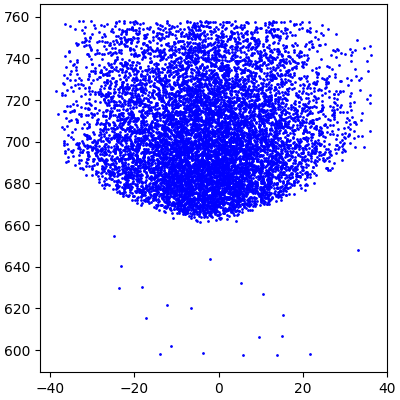

In [23]:
import matplotlib.pyplot as plt
dld_peak = data_crop['t (ns)'].to_numpy()
dld_x_peak = data_crop['y_det (cm)'].to_numpy()
mask_temporal = np.logical_and((dld_peak > 594),
                               (dld_peak < 758))
dld_peak = dld_peak[mask_temporal] 
dld_x_peak = dld_x_peak[mask_temporal]
fig1, ax1 = plt.subplots(figsize=(4,4), constrained_layout=True)
mask = np.random.randint(0, len(dld_peak), 10000)

x = plt.scatter(dld_x_peak[mask]*10, dld_peak[mask], color="blue", label=r"$t$", s=1)
plt.show()